### 线性回归

1. 线性模型就是对输入特征加权求和，再加上一个我们称为偏置项（也称为截距项）的常数
    - <img src="./images/线性模型公式.png" width=700 height=100>
2. 训练模型就是设置模型参数直到模型最拟合训练集的过程
3. 判断模型是否拟合训练集的最好方法是计算损失函数，损失函数衡量模型预测值与真实值之间的差距，常用方法是MSE
4. 线性模型有解析解，可以直接计算出最合适的参数
    - <img src="./images/线性模型解析解.png" width=700 height=100>

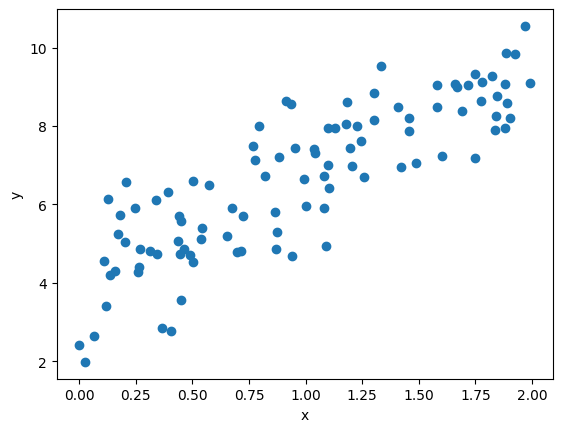

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# rand是生成（0-1）之间的数字，randn是生成标准正态分布的数字
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#### 使用解析解的方式计算出最好的参数

In [2]:
X_b = np.c_[np.ones((100,1)),X] # 加上一列1是考虑岛theta_0
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.96527107]
 [2.76373499]]


#### 现在可以做出预测

In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[3.96527107]
 [9.49274105]]


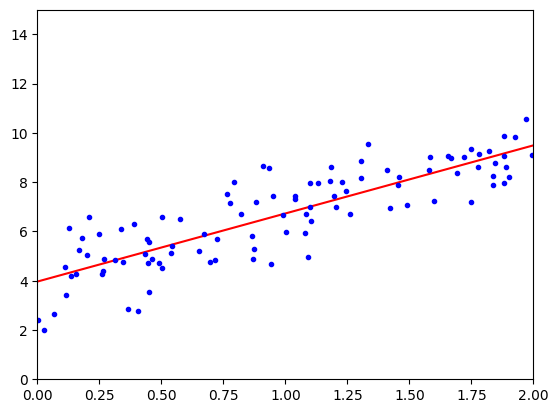

In [4]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
# x轴的范围是0到2，y轴的范围是0到15。
plt.axis([0,2,0,15])
plt.show()

#### 使用scikit-learn来执行线性回归

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
# Scikit-Learn将偏差项（intercept_）与特征权重（coef_）分开。
print(lin_reg.intercept_,lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.96527107] [[2.76373499]]
[[3.96527107]
 [9.49274105]]


#### 计算复杂度
1. 标准方程计算XT X的逆，X^T X是一个（n+1）×（n+1）的矩阵（n是特征数量）​。对这种矩阵求逆的计算复杂度通常为O（n2.4）到O（n3）之间，取决于具体实现。换句话说，如果将特征数量翻倍，那么计算时间将乘以大约22.4=5.3倍到23=8倍之间。
2. Scikit-Learn的LinearRegression类使用的SVD方法的复杂度约为O（n2）​。如果你将特征数量加倍，那计算时间大约是原来的4倍

### 梯度下降
1. 梯度下降的中心思想就是迭代地调整参数从而使成本函数最小化
    - <img src="./images/随机梯度下降.png" width=700 height=200>
2. 梯度下降中一个重要参数是每一步的步长，这取决超参数学习率
    - 学习率太低，算法需要经过大量迭代才能收敛，这将耗费很长时间
    - 反过来说，如果学习率太高，那你可能会越过山谷直接到达另一边，甚至有可能比之前的起点还要高。这会导致算法发散，值越来越大，最后无法找到好的解决方案
3. 可能会陷入到局部最优
    - <img src="./images/局部最优.png" width=700 height=200>
4. 线性回归模型的MSE成本函数恰好是个凸函数，这意味着连接曲线上任意两点的线段永远不会跟曲线相交。也就是说，不存在局部最小值，只有一个全局最小值。它同时也是一个连续函数，所以斜率不会产生陡峭的变化[1]
5. 成本函数虽然是碗状的，但如果不同特征的尺寸差别巨大，那它可能是一个非常细长的碗，应用梯度下降时，需要保证所有特征值的大小比例都差不多（比如使用Scikit-Learn的StandardScaler类）​，否则收敛的时间会长很多
    - <img src="./images/细长的碗.png" width=700 height=200>


### 批量梯度下降
1. 成本函数的偏导数
    - <img src="./images/成本函数的偏导数.png" width=700 height=200>
2. 解析解
    - <img src="./images/成本函数偏导解析解.png" width=700 height=400>
3. 每一步都使用整批训练数据
4. 梯度下降的公式：
    - <img src="./images/梯度下降公式.png" width=700 height=150>


In [6]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
    
print(theta)

[[3.96527107]
 [2.76373499]]


1. 要找到合适的学习率，可以使用网格搜索，但是你可能需要限制迭代次数，这样网格搜索可以淘汰掉那些收敛耗时太长的模型。
2. 如何设置时间：一个简单的办法是在开始时设置一个非常大的迭代次数，但是当梯度向量的值变得很微小时中断算法——也就是当它的范数变得低于（称为容差）时，因为这时梯度下降已经（几乎）到达了最小值。

### 随机梯度下降
1. 批量梯度下降的主要问题是它要用整个训练集来计算每一步的梯度，所以训练集很大时，算法会特别慢。与之相反的极端是随机梯度下降，每一步在训练集中随机选择一个实例，并且仅基于该单个实例来计算梯度。
2. 另一方面，由于算法的随机性质，它比批量梯度下降要不规则得多。成本函数将不再是缓缓降低直到抵达最小值，而是不断上上下下，但是从整体来看，还是在慢慢下降
    - <img src='./images/随机梯度下降示例图.png' height=300 width = 700>
3. 随机梯度下降其实可以帮助算法跳出局部最小值，所以相比批量梯度下降，它对找到全局最小值更有优势。
4. 但缺点是永远定位不出最小值。要解决这个困境，有一个办法是逐步降低学习率。开始的步长比较大（这有助于快速进展和逃离局部最小值）​，然后越来越小，让算法尽量靠近全局最小值。
5. 使用随机梯度下降时，训练实例必须独立且均匀分布（IID）​，以确保平均而言将参数拉向全局最优值。确保这一点的一种简单方法是在训练过程中对实例进行随机混洗
6. 要使用带有Scikit-Learn的随机梯度下降执行线性回归，可以使用SGDRegressor类，该类默认优化平方误差成本函数。

In [7]:
n_epochs = 50
t0, t1 = 5, 50

# 随着时间的增加，学习率逐渐下降
def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[3.98074031]
 [2.73813998]]


In [8]:
from sklearn.linear_model import SGDRegressor

# 在 SGDRegressor 中，fit 方法期望 X 和 y 的形状分别为 (n_samples, n_features) 和 (n_samples,)。如果 y 是一个二维数组（例如 (n_samples, 1)），则需要使用 y.ravel() 将其转换为一维数组 (n_samples,) 以符合模型的输入要求。
seg_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
seg_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [9]:
print(seg_reg.intercept_,seg_reg.coef_)

[3.88857278] [2.71457428]


#### 小批量梯度下降
1. 在每一步中，不是根据完整的训练集（如批量梯度下降）或仅基于一个实例（如随机梯度下降）来计算梯度，小批量梯度下降在称为小型批量的随机实例集上计算梯度。小批量梯度下降优于随机梯度下降的主要优点是，你可以通过矩阵操作的硬件优化来提高性能，特别是在使用GPU时
2. 不同梯度下降方法比较：
    - <img src="./images/不同梯度下降方法比较.png" width=700 height=300>
    - <img src="./images/梯度下降算法比较.png" width=700 height=200>

### 多项式回归
1. PolynomialFeatures还可以将特征的所有组合添加到给定的多项式阶数。例如，如果有两个特征a和b，则degree=3的PolynomialFeatures不仅会添加特征a2、a3、b2和b3，还会添加组合ab、a2b和ab2。
2. PolynomialFeatures（degree=d）可以将一个包含n个特征的数组转换为包含个特征的数组，其中n!是n的阶乘，等于1×2×3×…×n。要小心特征组合的数量爆炸

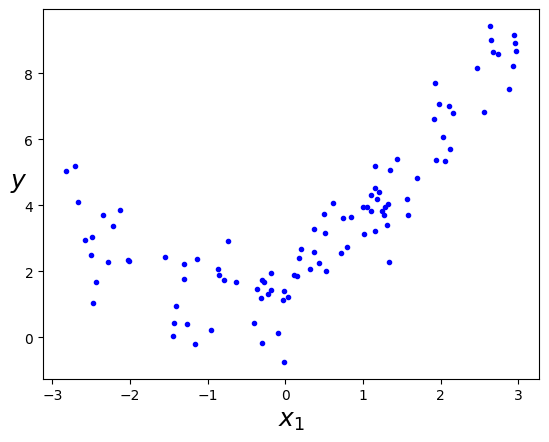

In [10]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
# X_poly现在包含X的原始特征以及该特征的平方
print(X[:5])
print(X_poly[:5])

[[1.24467986]
 [1.92649576]
 [1.10260473]
 [1.20518902]
 [1.33462106]]
[[1.24467986 1.54922795]
 [1.92649576 3.71138591]
 [1.10260473 1.21573719]
 [1.20518902 1.45248057]
 [1.33462106 1.78121338]]


In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.84061025] [[0.93370362 0.56294769]]


### 学习曲线
1. 但是总的来说，你不知道数据由什么函数生成，那么如何确定模型的复杂性呢？你如何判断模型是过拟合数据还是欠拟合数据呢？
2. 你使用交叉验证来估计模型的泛化性能。如果模型在训练数据上表现良好，但根据交叉验证的指标泛化较差，则你的模型过拟合。如果两者的表现均不理想，则说明欠拟合。这是一种区别模型是否过于简单或过于复杂的方法

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

1. 当训练集中只有一个或两个实例时，模型可以很好地拟合它们，这就是曲线从零开始的原因。但是，随着将新实例添加到训练集中，模型就不可能完美地拟合训练数据，这既因为数据有噪声，又因为它根本不是线性的
2. 训练数据上的误差会一直上升，直到达到平稳状态，此时在训练集中添加新实例并不会使平均误差变好或变差
3. 这些学习曲线是典型的欠拟合模型。两条曲线都达到了平稳状态。它们很接近而且很高

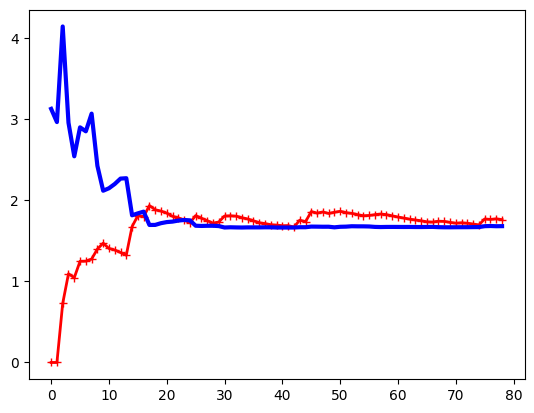

In [14]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

1. 与线性回归模型相比，训练数据上的误差要低得多。
2. 在训练数据上的性能要比在验证数据上的性能好得多，这是过拟合模型的标志
3. 改善过拟合模型的一种方法是向其提供更多的训练数据，直到验证误差达到训练误差为止

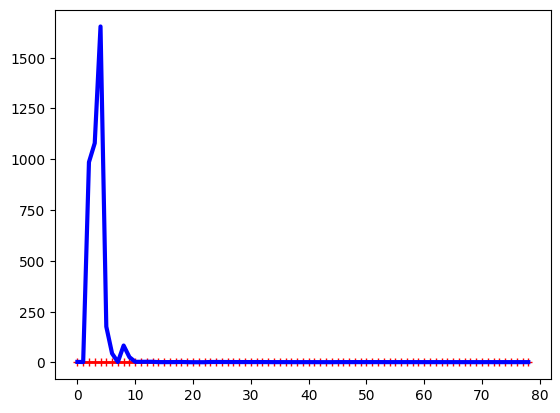

In [15]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

### 偏差/方差权衡
1. 偏差-方差权衡是机器学习中的一个核心概念。偏差是指模型的错误类型，即模型预测的值与真实值之间的差异。方差是指模型对训练数据的**敏感程度**，即模型在不同训练数据集上的表现差异。偏差-方差权衡是指在降低偏差的同时增加方差，或者降低方差的同时增加偏差。
2. 增加模型的复杂度通常会显著提升模型的方差并减少偏差。反过来，降低模型的复杂度则会提升模型的偏差并降低方差。这就是为什么称其为权衡

### 正则化线性模型
1. 减少过拟合的一个好方法是对模型进行正则化（即约束模型）​：它拥有的自由度越少，则过拟合数据的难度就越大。正则化多项式模型的一种简单方法是减少多项式的次数。
2. 对于线性模型，正则化通常是通过约束模型的权重来实现的。现在，我们看一下岭回归、Lasso回归和弹性网络，它们实现了三种限制权重的方法

#### 岭回归
1. 迫使学习算法不仅拟合数据，而且还使模型权重尽可能小。注意仅在训练期间将正则化项添加到成本函数中。训练完模型后，你要使用非正则化的性能度量来评估模型的性能。
2. 好的训练成本函数应该具有对优化友好的导数，而用于测试的性能指标应尽可能接近最终目标。
    - <img src="./images/岭回归成本函数.png" width=700 height=200>
3. 超参数α控制要对模型进行正则化的程度。如果α=0，则岭回归仅是线性回归。如果α非常大，则所有权重最终都非常接近于零，结果是一条经过数据均值的平线
4. 偏置项θ0没有进行正则化
5. 在执行岭回归之前缩放数据（例如使用StandardScaler）很重要，因为它对输入特征的缩放敏感。大多数正则化模型都需要如此。
    - <img src="./images/岭回归正则化效果.png" width=700 height=200>
6. 岭回归的最小二乘的解
    - <img src="./images/岭回归封闭解.png" width=700 height=200>

In [16]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])
### Lasso回归

array([[4.86220741]])

In [17]:
# 表示采用岭回归
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.84209709])

#### Lasso回归
1. 线性回归的另一种正则化叫作最小绝对收缩和选择算子回归（Least Absolute Shrinkage andSelection Operator Regression，简称Lasso回归）​。
    - <img src="./images/Lasso的正则化表达式.png" width=700 height=200>
2. Lasso回归的一个重要特点是它倾向于完全消除掉最不重要特征的权重（也就是将它们设置为零）​。换句话说，Lasso回归会自动执行特征选择并输出一个稀疏模型（即只有很少的特征有非零权重）​。

In [18]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.81973334])

In [19]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/root/anaconda3/envs/landmark/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.86791299])

#### 弹性网络
1. 弹性网络是介于岭回归和Lasso回归之间的中间地带。正则项是岭和Lasso正则项的简单混合，你可以控制混合比r。当r=0时，弹性网络等效于岭回归，而当r=1时，弹性网络等效于Lasso回归（见公式4-12）​。
    - <img src="./images/弹性网络.png" width=800 height=200>
2. 那么什么时候应该使用普通的线性回归（即不进行任何正则化）​、岭、Lasso或弹性网络呢？通常来说，有正则化——哪怕很小，总比没有更可取一些。所以大多数情况下，你应该避免使用纯线性回归。岭回归是个不错的默认选择，但是如果你觉得实际用到的特征只有少数几个，那就应该更倾向于Lasso回归或是弹性网络，因为它们会将无用特征的权重降为零。
3. 一般而言，弹性网络优于Lasso回归，因为当特征数量超过训练实例数量，又或者是几个特征强相关时,一般而言，弹性网络优于Lasso回归，因为当特征数量超过训练实例数量，又或者是几个特征强相关时，Lasso回归的表现往往不尽如人意。

In [20]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.81935908])

#### 提前停止
1. 经过一轮一轮的训练，算法不断地学习，训练集上的预测误差（RMSE）自然不断下降，同样其在验证集上的预测误差也随之下降。但是，一段时间之后，验证误差停止下降反而开始回升。通过早期停止法，一旦验证误差达到最小值就立刻停止训练
    - <img src="./images/提早停止.png" width=700 height=200>
2. 使用**warm_start=True**的情况下，当调用fit（​）方法时，它将在停止的地方继续训练，而不是从头开始

In [21]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 准备数据
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


NameError: name 'X_train' is not defined

### 逻辑回归
1. 一些回归算法也可用于分类（反之亦然）​。逻辑回归（Logistic回归，也称为Logit回归）被广泛用于估算一个实例属于某个特定类别的概率。​
2. 逻辑回归模型也是计算输入特征的加权和（加上偏置项）​，但是不同于线性回归模型直接输出结果，它输出的是结果的数理逻辑值，加上了一个sigma函数

#### 训练和成本函数
1. 不同于线性回归，逻辑回归的cost function没有已知的闭式方程（不存在一个标准方程的等价方程）来计算出最小化成本函数的θ值，好消息是这是个凸函数，所以通过梯度下降（或是其他任意优化算法）保证能够找出全局最小值

#### 决策边界
1. 一个特征点的决策边界是一个点，两个特征的决策边界是一条直线，三个特征的决策边界是一个平面，高维特征的决策边界为超平面
2. 控制Scikit-Learn LogisticRegression模型的正则化强度的超参数不是alpha（与其他线性模型一样）​，而是反值C。C值越高，对模型的正则化越少。

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris['data'][:, 3].reshape((-1,1))
# y只标记了某一个特殊的类别，如果是这个类别则为1，不是为0，.astype(np.int64)是将布尔类型转化为int类型
y = (iris['target'] == 2).astype(np.int64).reshape((-1,1))
print(X)
print(y)


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]


In [4]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

花瓣宽度在0到3cm之间的鸢尾花，模型估算出的概率

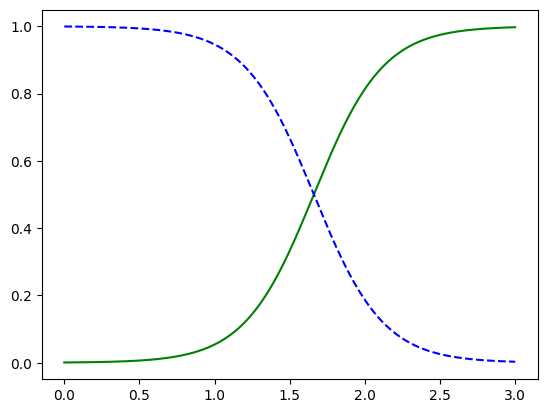

In [36]:
X_new = np.linspace(0,3,1000).reshape((-1,1))
# predict 直接返回1，0结果
# predict返回的是第一列是是0的概率，第1列是1的概率
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:,1],'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris virginica')


### Softmax 回归
1. 逻辑回归模型经过推广，可以直接支持多个类别
2. Softmax回归分类器一次只能预测一个类，它是多类，而不是多输出，因此它只能与互斥的类（例如不同类型的植物）一起使用。你无法使用它在一张照片中识别多个人
3. Scikit-Learn的LogisticRegressio默认选择使用的是一对多的训练方式，不过将超参数multi_class设置为"multinomial"，可以将其切换成Softmax回归。你还必须指定一个支持Softmax回归的求解器，比如"lbfgs"求解器
4. 控制Scikit-Learn LogisticRegression模型的正则化强度的超参数不是alpha（与其他线性模型一样）​，而是反值C。C值越高，对模型的正则化越少。

### 成本函数
1. 交叉熵经常被用于衡量一组估算出的类概率跟目标类的匹配程度

In [6]:
X = iris['data'][:, (2,3)]
y = iris['target']
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [8]:
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))



[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


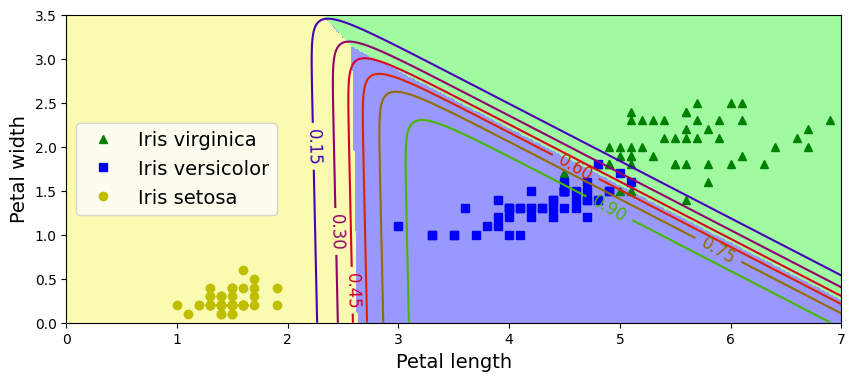

In [21]:
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1,1),
    np.linspace(0, 3.5, 200).reshape(-1,1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

# 对创建的网格中的每一个数据点进行预测，得出对应的结果
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot( X[y==2, 0], X[y==2, 1], 'g^', label='Iris virginica')
plt.plot( X[y==1, 0], X[y==1, 1], 'bs', label='Iris versicolor')
plt.plot( X[y==0, 0], X[y==0, 1], 'yo', label='Iris setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

# 这段代码是用Python的matplotlib库绘制等高线图
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()




### 练习题
1. 使用随机梯度下降或者小批量梯度下降
2. 梯度下降会受到影响：算法收敛或者趋于最优值的速率会下降，进行归一化操作解决这个问题
3. 不会，由于逻辑回归的cost function是凸函数，所以不会陷入局部最优
4. 不一定
5. 过拟合，及早停止
6. 不一定，由于随机性，可能还未到达最优值附近，应该每隔一段时间保存一次模型
7. 随机梯度下降，批量梯度下降
8. 欠拟合，增加模型复杂度
9. 模型存在高方差，减小超参数alpha的大小
10. 
    - 防止过拟合
    - 可以将不重要的特征的权重减低为0，可以自动选择特征，如果认为只有少数特征比较重要则可以选择lasso
    - lasso在某些情况下可能会有不稳定的行为
11. 使用逻辑回归，二分类模型

#### Softmax 知识点
1. 类k的Softmax分数：先通过线性函数计算出得分,每个类都有自己的特定参数向量θ（k）。所有这些向量通常都作为行存储在参数矩阵Θ中

In [49]:
class SoftMax:
    def __init__(self, X, y, class_num) -> None:
        self.X = X
        self.y = y
        self.theta = np.random.rand(X.shape[1],class_num)
        
    def softmax_proba(self):
        grades = np.dot(self.X, self.theta)
        tmp_grades = np.exp(grades - np.max(grades, axis=1, keepdims=True))  # 减去最大值以提高数值稳定性
        return tmp_grades / np.sum(tmp_grades, axis=1, keepdims=True)
    
    def softmax_predict(self):
        proba = self.softmax_proba()
        return np.argmax(proba, axis=1)
    
    def softmax_loss_function(self):
        proba = self.softmax_proba()
        y_hat = self.softmax_predict()
        y_cal = (y_hat == y).astype(np.int32).reshape(-1, 1)
        return -np.mean(np.sum( y_cal * np.log(proba + 1e-15), axis=1))
    
    def softmax_gradient(self):
        proba = self.softmax_proba()
        y_hat = self.softmax_predict()
        y_cal = (y_hat == y).astype(np.int32).reshape(-1, 1)
        return  np.sum(np.dot(X.T,(proba - y_cal))) / len(y)
    
    def forward(self):
        return self.softmax_proba()
    
    

In [51]:
"""
1. 手动实现softmax
2. 利用softmax进行批量梯度下降训练
3. 实现提前停止法    
4. 并且使用上图那个等高线绘制图像
"""
import numpy as np
np.random.seed(42)

# 类别数量
class_num = len(set(iris['target']))
X = iris['data']
y = iris['target']

softmax_reg = SoftMax(X,y,class_num)
softmax_reg.softmax_gradient()



-0.4339999999999992

In [3]:
X = iris['data'][:, (2,3)]
y = iris['target']

In [4]:
x_with_bias = np.c_[np.ones([len(X),1]), X]

In [6]:
np.random.seed(2042)

In [8]:
test_ration = 0.2
validation_ratio = 0.2
total_size = len(x_with_bias)

test_size = int(total_size * test_ration)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

# 通过permutation打乱顺序
rnd_indices = np.random.permutation(total_size)

X_train = x_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = x_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = x_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]


In [12]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    # np.arange(m)是表示索引，y正好代表了第几列
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [10]:
y_train[:10]

array([1, 0, 0, 1, 0, 2, 1, 0, 0, 0])

In [11]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [13]:
y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [14]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [17]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train)) # == 3 (3 iris classes)
print(n_inputs)
print(n_outputs)

3
3


In [34]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

# 这是一个很好的方式来构建中间向量
Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.025337195107265
500 0.6907866341003089
1000 0.5624493921206437
1500 0.4926674096957035
2000 0.4491323559586856
2500 0.41883694199183436
3000 0.39603836951389715
3500 0.37790435867582844
4000 0.36289618879082114
4500 0.3501084440542775
5000 0.33897236051681745


In [36]:
Theta

array([[ 3.49447404, -0.92176431, -3.41581799],
       [-0.50770924,  1.11844585,  0.71593935],
       [-0.82626211, -0.87773519,  1.94190607]])

In [35]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.8666666666666667

In [39]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 1.594741956922854
500 0.5079896045776058
1000 0.48775505948221254
1500 0.4813316911901484
2000 0.47882586754353257
2500 0.47777759808652204
3000 0.47732321076905926
3500 0.47712213877998366
4000 0.4770320206226999
4500 0.47699130093584796
5000 0.47697280413497056


In [40]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

In [49]:
eta = 0.1 
n_iterations = 40001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.615640335180933
500 0.6092823131857443
1000 0.5833640190536831
1500 0.5746030641806366
2000 0.5707777747857593
2500 0.5689717186459262
3000 0.5680653066847048
3500 0.5675844895310368
4000 0.5673162759677397
4500 0.5671598829680397
5000 0.5670652194769502
5500 0.567006167401545
6000 0.5669684611554936
6500 0.5669439616480678
7000 0.5669278402781128
7500 0.5669171358408093
8000 0.5669099830771713
8500 0.5669051825242507
9000 0.5669019508874827
9500 0.5668997708990545
10000 0.5668982982454098
10500 0.5668973024599269
11000 0.5668966286836651
11500 0.5668961725847702
12000 0.5668958637447374
12500 0.5668956545757988
13000 0.5668955128916822
13500 0.5668954169105057
14000 0.5668953518857529
14500 0.5668953078312657
15000 0.5668952779833277
15500 0.566895257760255
16000 0.5668952440581965
16500 0.5668952347743395
17000 0.5668952284840048
17500 0.5668952242219318
18000 0.5668952213341176
18500 0.5668952193774437
19000 0.5668952180516733
19500 0.5668952171533796
20000 0.5668952165447281
20

In [50]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

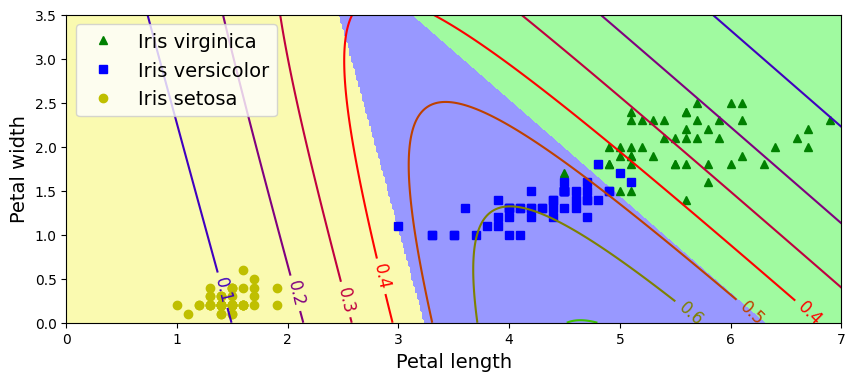

In [52]:
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()